<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/DEcision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,  roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import  roc_auc_score

from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# загрузим датасет crx
crx= pd.read_csv('crx.data', header=None)

# посмотрим данные
print(crx.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


In [ ]:
# посмотрим на информацию в  файле glass.names
with open('crx.names', 'r') as file:
    content = file.read()
print(content)


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [ ]:
# посмотрим на информацию в  файле glass.names
with open('credit.names', 'r') as file:
    content = file.read()
print(content)

1. Title: Japanese Credit Screening (examples & domain theory)

2. Source information:
   -- Creators: Chiharu Sano 
   -- Donor: Chiharu Sano
             csano@bonnie.ICS.UCI.EDU
   -- Date: 3/19/92

3. Past usage: 
   -- None Published

4. Relevant information:
   --  Examples represent positive and negative instances of people who were and were not 
       granted credit.
   --  The theory was generated by talking to the individuals at a Japanese company that grants
       credit.

5. Number of instances: 125






In [ ]:
with open('credit.lisp', 'r') as file:
    data = file.read()
    print(data)


;; positive examples represent people that were granted credit
(def-pred credit_screening :type (:person) 
  :pos
  ((s1) (s2) (s4) (s5) (s6) (s7) (s8) (s9) (s14) (s15) (s17) (s18) (s19)
   (s21) (s22) (s24) (s28) (s29) (s31) (s32) (s35) (s38) (s40) (s41)
   (s42) (s43) (s45) (s46) (s47) (s49) (s50) (s51) (s53) (s54) (s55)
   (s56) (s57) (s59) (s61) (s62) (s63) (s64) (s65) (s66) (s69) (s70)
   (s71) (s72) (s73) (s74) (s75) (s76) (s77) (s78) (s79) (s80) (s81)
   (s83) (s84) (s85) (s86) (s87) (s89) (s90) (s91) (s92) (s93) (s94)
   (s96) (s97) (s98) (s100) (s103) (s104) (s106) (s108) (s110) (s116)
   (s117) (s118) (s119) (s121) (s122) (s123) (s124))
  :neg
  ((s3) (s10) (s11) (s12) (s13) (s16) (s20) (s23) (s25) (s26) (s27) 
   (s30) (s33) (s34) (s36) (s37) (s39) (s44) (s48) (s52) (s58) (s60)
   (s67) (s68) (s82) (s88) (s95) (s99) (s101) (s102) (s105) (s107)
   (s109) (s111) (s112) (s113) (s114) (s115) (s120) (s125)))

(def-pred jobless :type (:person) :pos
  ((s3) (s10) (s12) (s23) (s34) 

In [ ]:
crx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
# видим, что у нас 690 строки, ненулевых строк нет, однако в описании данных, написано, что у нас есть отсутствующие значения:
  #   A1:12
   # A2:  12
    #A4:   6
    #A5:   6
    #A6:   9
    #A7:   9
    #A14: 13

#переименуем столбцы в  соответствующие буквенные обозначения, чтобы избежать путаницы, а также удалим строки с пропущенными значениями,
#т.к. таких всего 5%, это лучший способ улучшения наших данных для того чтобы модель давала реальные прогнозы.

In [ ]:
# Зададим названия столбцов для удобства
crx.columns = [  'A1', 'A2', 'A3', 'A4', 'A5',
   'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

In [ ]:
# Удаляем строки, содержащие знак вопроса
crx_cleaned = crx[~crx.applymap(lambda x: x == '?').any(axis=1)]


print('Размерность  после удаления:', crx_cleaned.shape)



Размерность  после удаления: (653, 16)


In [ ]:
# применим Encoding к категориальным признакам. Для всех категориальных признаков. ключая бинарные,
#применим One-Hot Encoding, чтобы избежать переоценки каких-либо признаков по сравнению с другими, к тому же у нас
#нет информации об этих признаках, как они соотносятся друг с другом.

In [ ]:
crx_encoding = pd.get_dummies(crx_cleaned, columns=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16'])

print(crx_encoding)
print(crx_encoding.columns)
print(crx_encoding['A2'])


        A2      A3    A8  A11    A14  A15   A1_a   A1_b   A4_l   A4_u  ...  \
0    30.83   0.000  1.25    1  00202    0  False   True  False   True  ...   
1    58.67   4.460  3.04    6  00043  560   True  False  False   True  ...   
2    24.50   0.500  1.50    0  00280  824   True  False  False   True  ...   
3    27.83   1.540  3.75    5  00100    3  False   True  False   True  ...   
4    20.17   5.625  1.71    0  00120    0  False   True  False   True  ...   
..     ...     ...   ...  ...    ...  ...    ...    ...    ...    ...  ...   
685  21.08  10.085  1.25    0  00260    0  False   True  False  False  ...   
686  22.67   0.750  2.00    2  00200  394   True  False  False   True  ...   
687  25.25  13.500  2.00    1  00200    1   True  False  False  False  ...   
688  17.92   0.205  0.04    0  00280  750  False   True  False   True  ...   
689  35.00   3.375  8.29    0  00000    0  False   True  False   True  ...   

      A9_t  A10_f  A10_t  A12_f  A12_t  A13_g  A13_p  A13_s  A1

In [ ]:
crx_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      653 non-null    object 
 1   A3      653 non-null    float64
 2   A8      653 non-null    float64
 3   A11     653 non-null    int64  
 4   A14     653 non-null    object 
 5   A15     653 non-null    int64  
 6   A1_a    653 non-null    bool   
 7   A1_b    653 non-null    bool   
 8   A4_l    653 non-null    bool   
 9   A4_u    653 non-null    bool   
 10  A4_y    653 non-null    bool   
 11  A5_g    653 non-null    bool   
 12  A5_gg   653 non-null    bool   
 13  A5_p    653 non-null    bool   
 14  A6_aa   653 non-null    bool   
 15  A6_c    653 non-null    bool   
 16  A6_cc   653 non-null    bool   
 17  A6_d    653 non-null    bool   
 18  A6_e    653 non-null    bool   
 19  A6_ff   653 non-null    bool   
 20  A6_i    653 non-null    bool   
 21  A6_j    653 non-null    bool   
 22  A6_k   

In [ ]:
crx_encoding['A2'] = pd.to_numeric(crx_encoding['A2'], errors='coerce')
# Проверить наличие пропущенных значений после преобразования
print(crx_encoding['A2'].isnull().sum())
print(crx_encoding['A2'].describe())




0
count    653.000000
mean      31.503813
std       11.838267
min       13.750000
25%       22.580000
50%       28.420000
75%       38.250000
max       76.750000
Name: A2, dtype: float64


In [ ]:
#данный столбец похож на данные о возрасте клиента, мы видим, что средний возраст 31 год, минимальный 14 (что немного странно),
#максимальный 77 лет

In [ ]:
crx_encoding['A14'] = pd.to_numeric(crx_encoding['A14'], errors='coerce')
# Проверить наличие пропущенных значений после преобразования
print(crx_encoding['A14'].isnull().sum())
print(crx_encoding['A14'].describe())

0
count     653.000000
mean      180.359877
std       168.296811
min         0.000000
25%        73.000000
50%       160.000000
75%       272.000000
max      2000.000000
Name: A14, dtype: float64


In [ ]:
#характеристика А14 имеет максимум 2000, среднее значение 180

In [ ]:
crx_encoding[['A1_a', 'A1_b', 'A4_l', 'A4_u',
       'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'A13_g', 'A13_p', 'A13_s', 'A16_+', 'A16_-']] = crx_encoding[['A1_a', 'A1_b', 'A4_l', 'A4_u',
       'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'A13_g', 'A13_p', 'A13_s', 'A16_+', 'A16_-']].astype(int)

In [ ]:
crx_encoding.head()


,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16_+,A16_-
0,30.83,0.000,1.25,1,202,0,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
1,58.67,4.460,3.04,6,43,560,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
2,24.50,0.500,1.50,0,280,824,1,0,0,1,...,1,1,0,1,0,1,0,0,1,0
3,27.83,1.540,3.75,5,100,3,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0
4,20.17,5.625,1.71,0,120,0,0,1,0,1,...,1,1,0,1,0,0,0,1,1,0


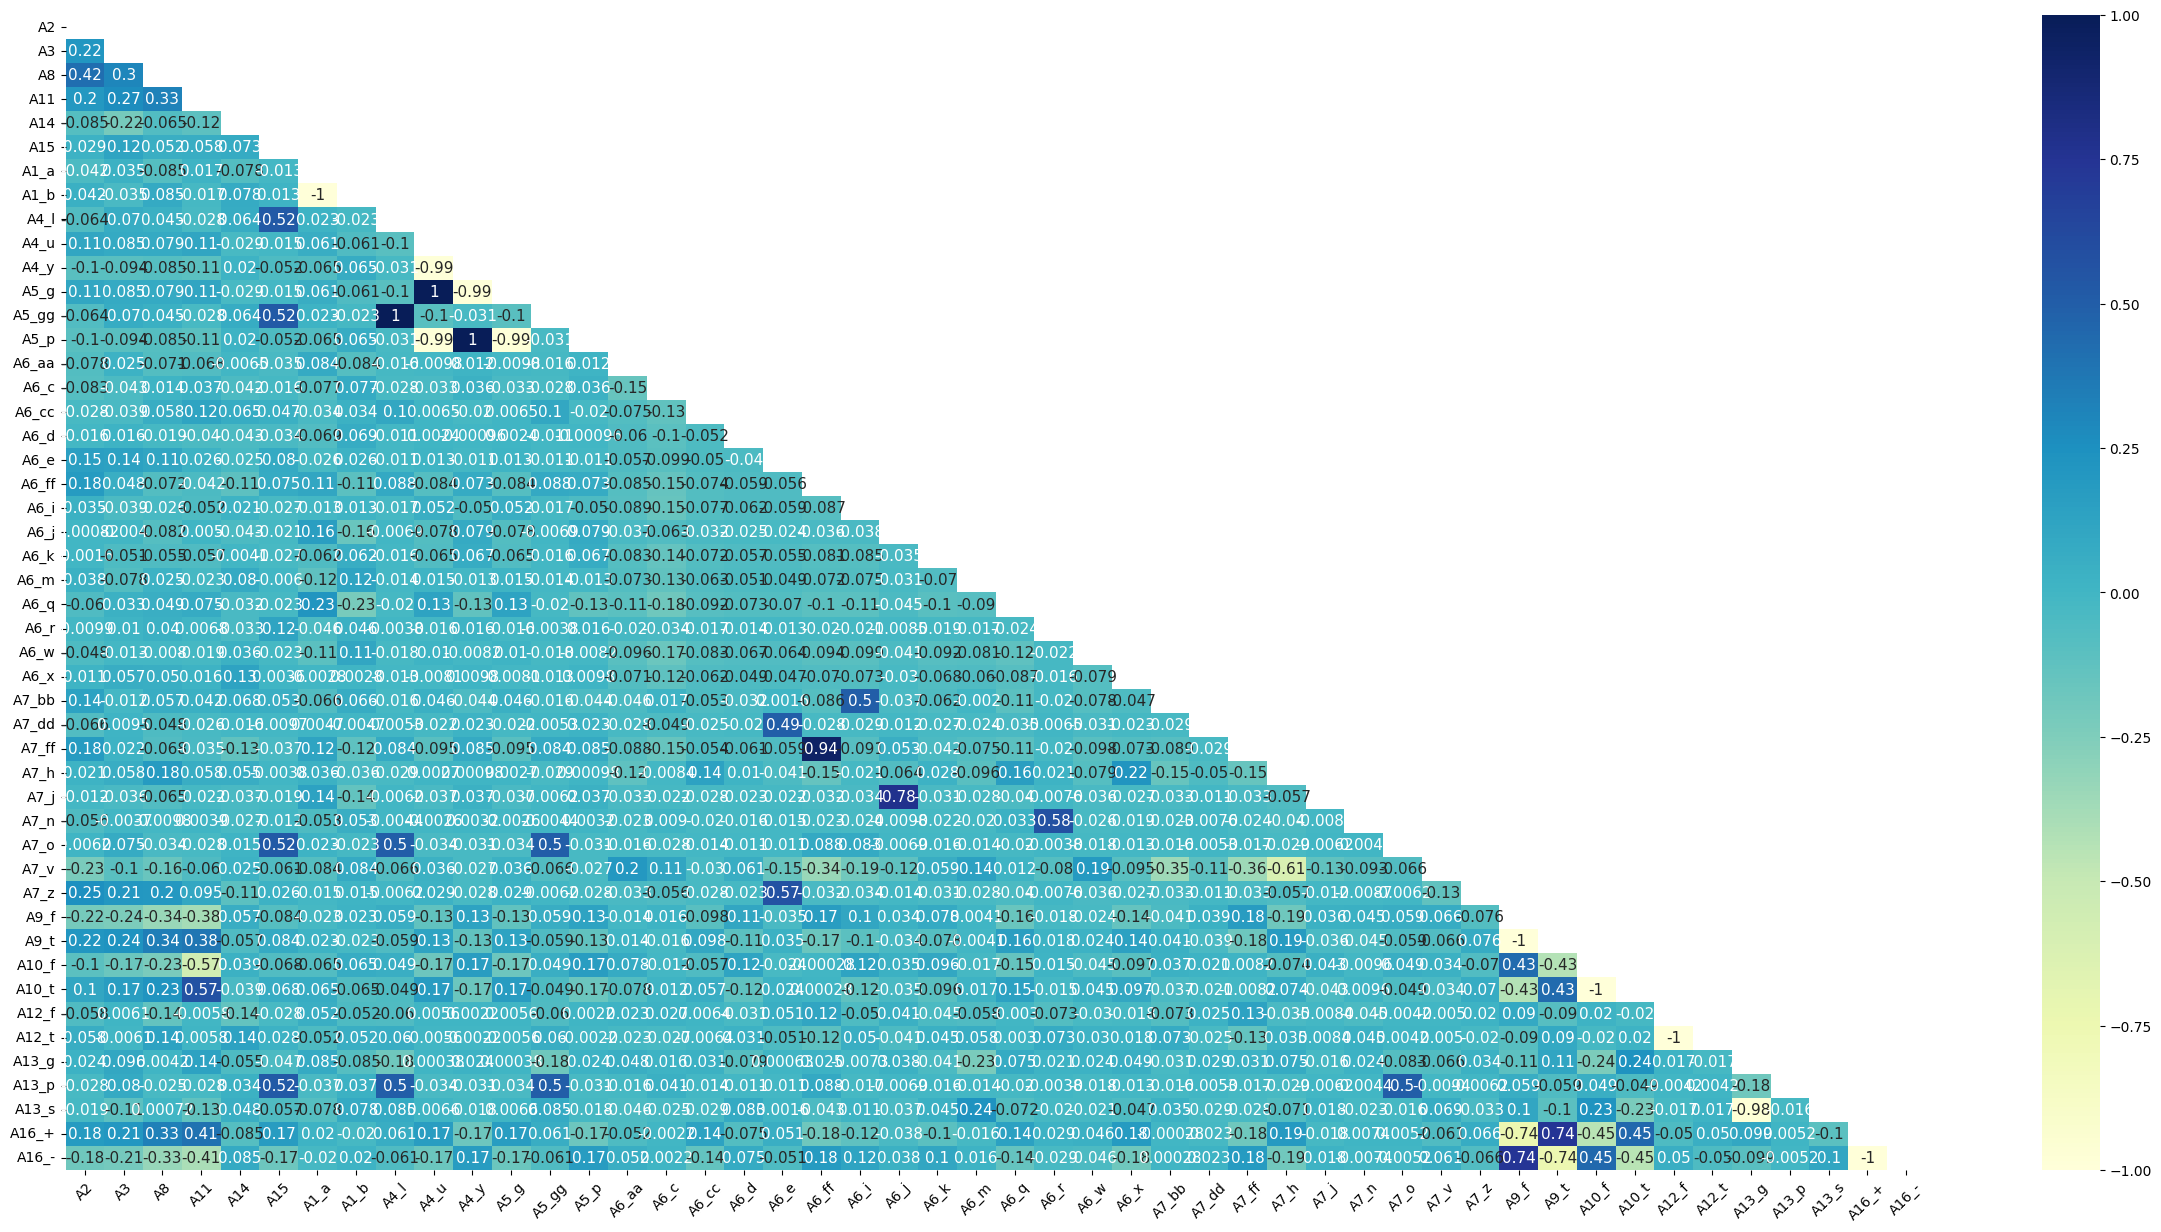

In [ ]:
# Построим матрицу корреляций при помощи  heatmap:

corr_matrix = crx_encoding.corr()

plt.figure(figsize=(30, 15))

mask = np.triu(corr_matrix)

sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.savefig('corr.png')
plt.show()

In [ ]:
# из корреляционной матрицы мы видим, что сильная корреляция от 80% и выше у следующих пар признаков: A5_g with A4_l,A5_gg with A4_u,
#A5_p with A4_y, A7_ff with A6_ff, A7_j with A6_j, A16+ with A9t, A16- with A9f

In [ ]:
#посмотри распределение для числовых характеристик

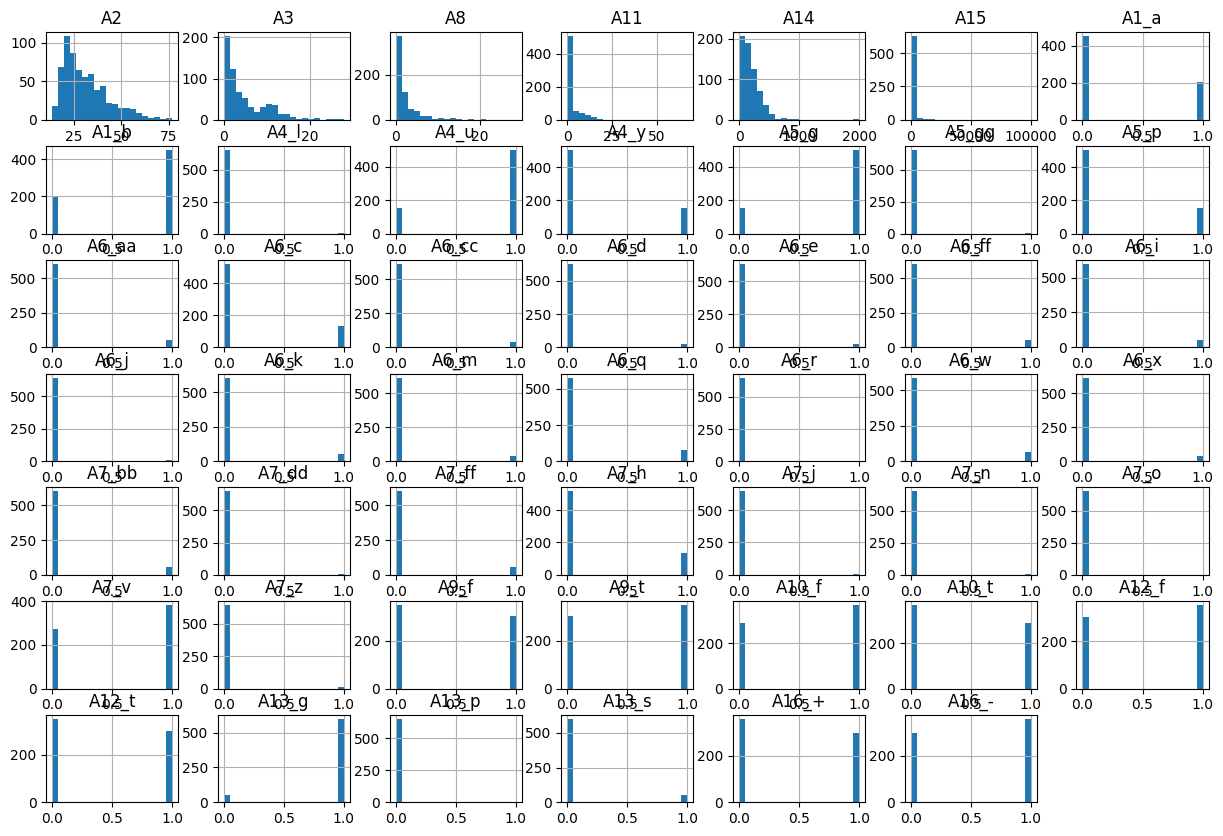

In [ ]:
crx_encoding.hist(figsize=(15, 10), bins=20)
plt.show()

In [ ]:
#Распределение числовых признаков далеко от нормального распределения

In [ ]:
# Посмотрим как связаны с таргетом бинарные признаки, в которых у нас скорее всего хранятся ответы на вопрос "да" и "нет"

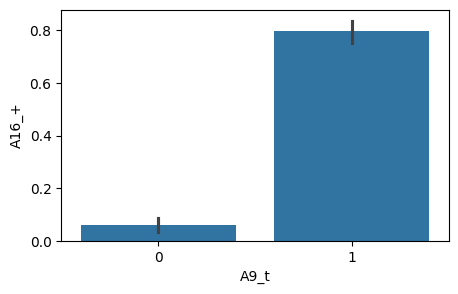

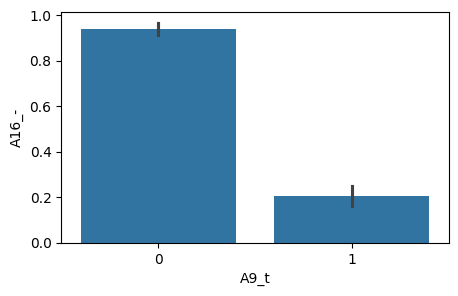

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x="A9_t", y="A16_+", data=crx_encoding)
plt.show()
plt.figure(figsize=(5, 3))
sns.barplot(x="A9_t", y="A16_-", data=crx_encoding)
plt.show()

In [ ]:
# Види четкую взаимосвязь между A9_t  и A16_+, а также A9_t и А16_- похоже на то, что когда ответ на вопрос А9 положительный,
#кредит выдают, а когда отрицательный - не выдают

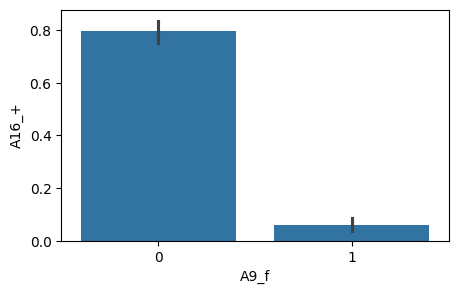

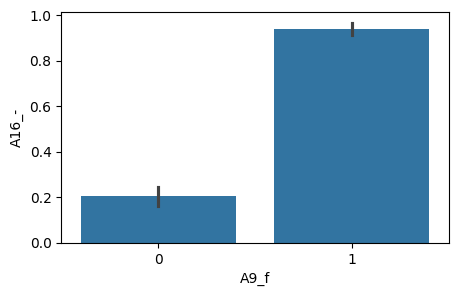

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x="A9_f", y="A16_+", data=crx_encoding)
plt.show()
plt.figure(figsize=(5, 3))
sns.barplot(x="A9_f", y="A16_-", data=crx_encoding)
plt.show()

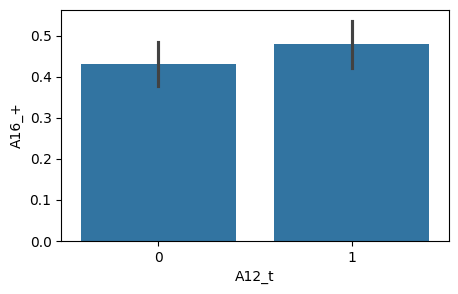

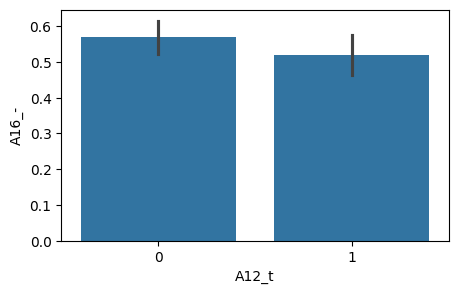

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x="A12_t", y="A16_+", data=crx_encoding)
plt.show()
plt.figure(figsize=(5, 3))
sns.barplot(x="A12_t", y="A16_-", data=crx_encoding)
plt.show()

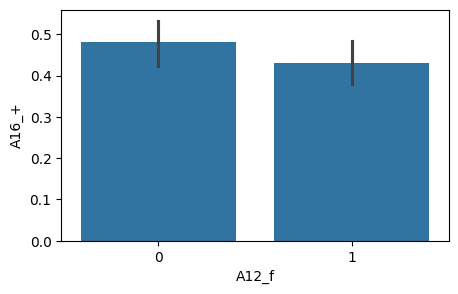

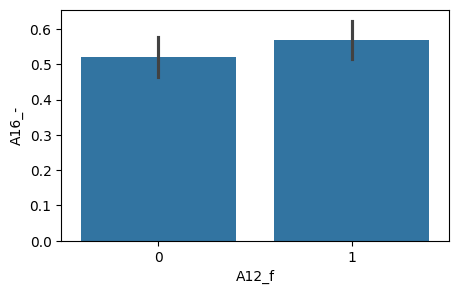

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x="A12_f", y="A16_+", data=crx_encoding)
plt.show()
plt.figure(figsize=(5, 3))
sns.barplot(x="A12_f", y="A16_-", data=crx_encoding)
plt.show()

In [ ]:
# между А12_t,f и А16_+ и А16_- не видим зависимости

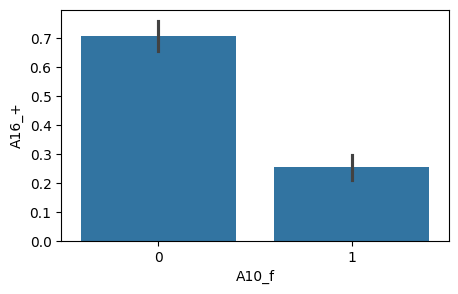

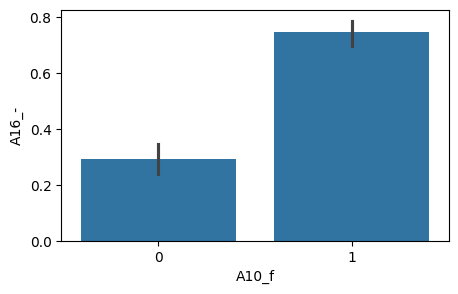

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x="A10_f", y="A16_+", data=crx_encoding)
plt.show()
plt.figure(figsize=(5, 3))
sns.barplot(x="A10_f", y="A16_-", data=crx_encoding)
plt.show()

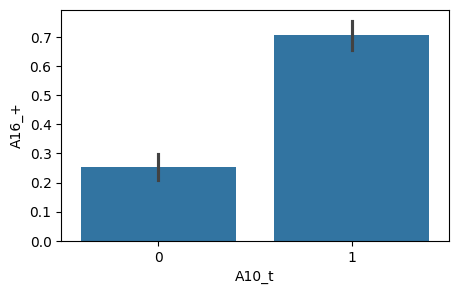

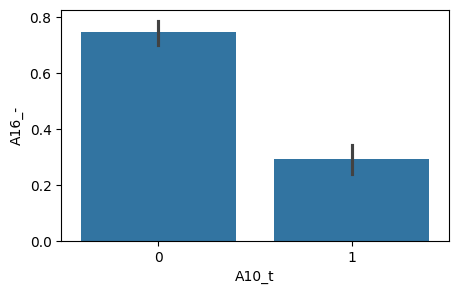

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x="A10_t", y="A16_+", data=crx_encoding)
plt.show()
plt.figure(figsize=(5, 3))
sns.barplot(x="A10_t", y="A16_-", data=crx_encoding)
plt.show()

In [ ]:
#Видим также четкую взаимосвязь между A10_t  и A16_+, а также A10_t и А16_- похоже на то, что когда ответ на вопрос А9 положительный,
#кредит выдают, а когда отрицательный - не выдают

In [ ]:
# Посмотрим статистику для A3 в зависимости от классов A16+ и A16-
a3_positive = crx_encoding[crx_encoding['A16_+'] == 1]['A3']
a3_negative = crx_encoding[crx_encoding['A16_-'] == 1]['A3']

print('Статистика для A3 (положительный таргет):')
print(a3_positive.describe())

print('\nСтатистика для A3 (отрицательный таргет):')
print(a3_negative.describe())


Статистика для A3 (положительный таргет):
count    296.000000
mean       5.971943
std        5.492651
min        0.000000
25%        1.500000
50%        4.480000
75%        9.561250
max       28.000000
Name: A3, dtype: float64

Статистика для A3 (отрицательный таргет):
count    357.000000
mean       3.882325
std        4.393079
min        0.000000
25%        0.835000
50%        2.210000
75%        5.000000
max       26.335000
Name: A3, dtype: float64


In [ ]:
# Видим, что  среднее значение для А3 выше для положительного таргета (А16+) - около 6, для отрицательного -около 4.
#Это может говорить о том, что для того, чтоб человек получил положительный ответ по кредиту, значение этого признака должно
#быть выше по отношению к отрицательному таргету.

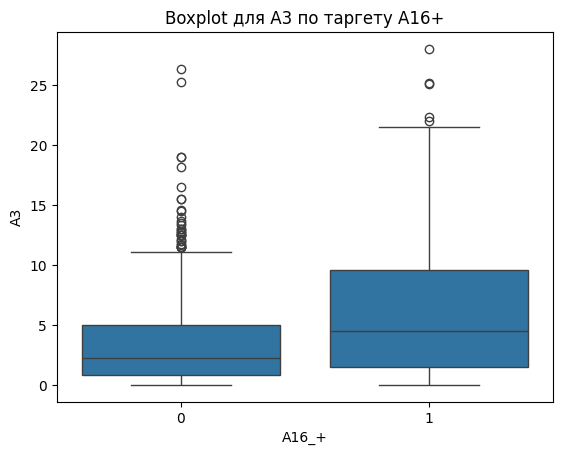

In [ ]:
# Построение ящичных диаграмм для A3 в зависимости от таргета для более наглядного анализа
sns.boxplot(x='A16_+', y='A3', data=crx_encoding)
plt.title('Boxplot для A3 по таргету A16+')
plt.show()



In [ ]:
#сейчас мы видим, что 50 % значений А3 для А16+ находятся от 5 до 23. для А16- мы видим что 99% значений находятся в пределах до 11,
#также видим определенное колличество выбросов у верхней границе усов.

In [ ]:
# Посмотрим статистику для A8 в зависимости от классов A16+ и A16-
a8_positive = crx_encoding[crx_encoding['A16_+'] == 1]['A8']
a8_negative = crx_encoding[crx_encoding['A16_-'] == 1]['A8']

print('Статистика для A8 (положительный таргет):')
print(a8_positive.describe())

print('\nСтатистика для A8 (отрицательный таргет):')
print(a8_negative.describe())


Статистика для A8 (положительный таргет):
count    296.000000
mean       3.475186
std        4.167399
min        0.000000
25%        0.750000
50%        2.000000
75%        5.000000
max       28.500000
Name: A8, dtype: float64

Статистика для A8 (отрицательный таргет):
count    357.000000
mean       1.223725
std        2.029272
min        0.000000
25%        0.125000
50%        0.455000
75%        1.500000
max       13.875000
Name: A8, dtype: float64


In [ ]:
# Видим, что  среднее значение для А8 выше для положительного таргета (А16+) - тоже около 3.47, для отрицательного - 1.22.


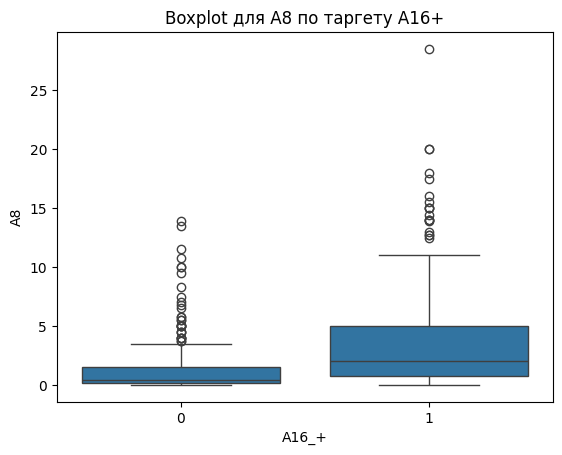

In [ ]:
# Построение ящичных диаграмм для A8 в зависимости от таргета для более наглядного анализа
sns.boxplot(x='A16_+', y='A8', data=crx_encoding)
plt.title('Boxplot для A8 по таргету A16+')
plt.show()


In [ ]:
#очевидна зависимость, что чем выше А8, тем большая вероятность, что человеку одобрят кредит

In [ ]:
# Посмотрим статистику для A11 в зависимости от классов A16+ и A16-
a11_positive = crx_encoding[crx_encoding['A16_+'] == 1]['A11']
a11_negative = crx_encoding[crx_encoding['A16_-'] == 1]['A11']

print('Статистика для A11 (положительный таргет):')
print(a11_positive.describe())

print('\nСтатистика для A11 (отрицательный таргет):')
print(a11_negative.describe())

Статистика для A11 (положительный таргет):
count    296.000000
mean       4.716216
std        6.398136
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       67.000000
Name: A11, dtype: float64

Статистика для A11 (отрицательный таргет):
count    357.000000
mean       0.666667
std        1.958368
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       20.000000
Name: A11, dtype: float64


In [ ]:
#Очень значительная разница —для положительного таргета среднее  значение 4.71, тогда как для отрицательного всего 0.66. Этот признак,
#возможно этот признак , наиболее сильно влияет на принятие решение о выдаче кредита

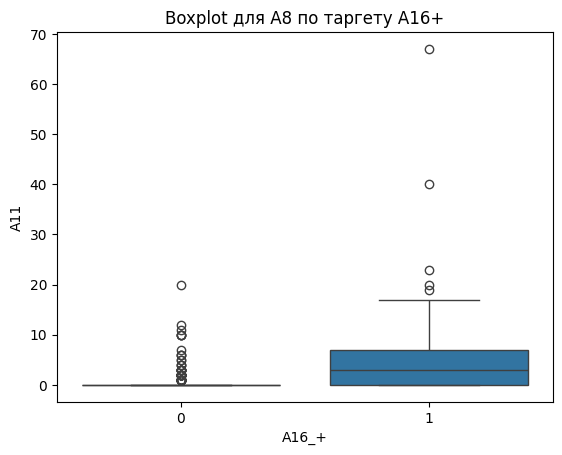

In [ ]:
# Построение ящичных диаграмм для A11 в зависимости от таргета для более наглядного анализа
sns.boxplot(x='A16_+', y='A11', data=crx_encoding)
plt.title('Boxplot для A8 по таргету A16+')
plt.show()

In [ ]:
#на графике явно видно, что этот параметр для отрицательного решения принимает значения чуть выше нуля.

In [ ]:
# Посмотрим статистику для A15 в зависимости от классов A16+ и A16-
a15_positive = crx_encoding[crx_encoding['A16_+'] == 1]['A15']
a15_negative = crx_encoding[crx_encoding['A16_-'] == 1]['A15']

print('Статистика для A15 (положительный таргет):')
print(a15_positive.describe())

print('\nСтатистика для A15 (отрицательный таргет):')
print(a15_negative.describe())

Статистика для A15 (положительный таргет):
count       296.000000
mean       2009.726351
std        7660.949172
min           0.000000
25%           0.000000
50%         210.500000
75%        1216.500000
max      100000.000000
Name: A15, dtype: float64

Статистика для A15 (отрицательный таргет):
count     357.000000
mean      187.974790
std       632.781715
min         0.000000
25%         0.000000
50%         1.000000
75%        67.000000
max      5552.000000
Name: A15, dtype: float64


In [ ]:
#А15 тоже сильно отличается в зависимости от А16+ и А16-, на несколько порядков, и мы видим большое отклонение относительно среднего
#скорее всего этот признак связан с доходом, который влияет на кредитоспособность.

In [ ]:
# Посмотрим статистику для A14 в зависимости от классов A16+ и A16-
a14_positive = crx_encoding[crx_encoding['A16_+'] == 1]['A14']
a14_negative = crx_encoding[crx_encoding['A16_-'] == 1]['A14']

print('Статистика для A8 (положительный таргет):')
print(a14_positive.describe())

print('\nСтатистика для A8 (отрицательный таргет):')
print(a14_negative.describe())

Статистика для A8 (положительный таргет):
count    296.000000
mean     164.621622
std      162.543550
min        0.000000
25%        0.000000
50%      120.000000
75%      280.000000
max      840.000000
Name: A14, dtype: float64

Статистика для A8 (отрицательный таргет):
count     357.000000
mean      193.408964
std       172.057953
min         0.000000
25%       100.000000
50%       160.000000
75%       260.000000
max      2000.000000
Name: A14, dtype: float64


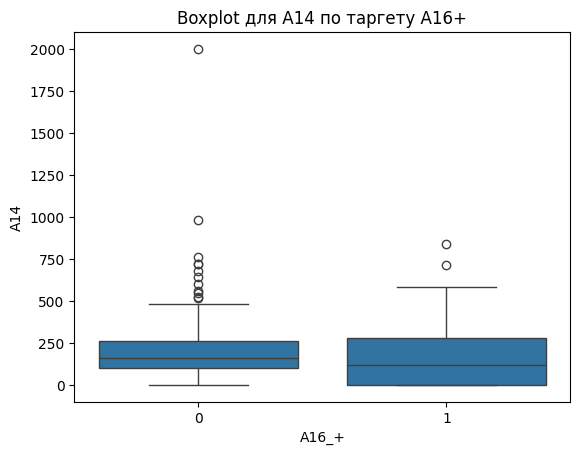

In [ ]:
# Построим  boxplotдиаграмм для A14 в зависимости от таргета для более наглядного анализа
sns.boxplot(x='A16_+', y='A14', data=crx_encoding)
plt.title('Boxplot для A14 по таргету A16+')
plt.show()

In [ ]:
#видим, что этот признак не сильно влияет на принятие решения

In [ ]:
# Посмотрим статистику для A2 в зависимости от классов A16+ и A16-
a2_positive = crx_encoding[crx_encoding['A16_+'] == 1]['A2']
a2_negative = crx_encoding[crx_encoding['A16_-'] == 1]['A2']

print('Статистика для A2 (положительный таргет):')
print(a2_positive.describe())

print('\nСтатистика для A2 (отрицательный таргет):')
print(a2_negative.describe())

Статистика для A2 (положительный таргет):
count    296.000000
mean      33.845473
std       12.689357
min       13.750000
25%       23.250000
50%       31.040000
75%       41.440000
max       76.750000
Name: A2, dtype: float64

Статистика для A2 (отрицательный таргет):
count    357.000000
mean      29.562269
std       10.719168
min       15.170000
25%       21.920000
50%       26.920000
75%       34.830000
max       74.830000
Name: A2, dtype: float64


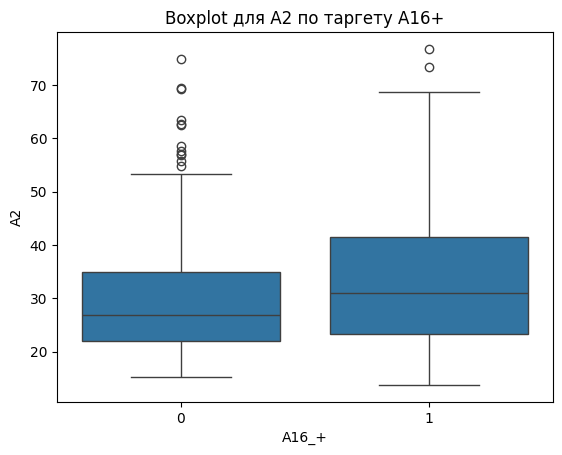

In [ ]:
# Построим Boxplot диаграмм для A11 в зависимости от таргета для более наглядного анализа
sns.boxplot(x='A16_+', y='A2', data=crx_encoding)
plt.title('Boxplot для A2 по таргету A16+')
plt.show()

In [ ]:
#видим, что возраст влияет на принятие решения, посмотрим детальнее:

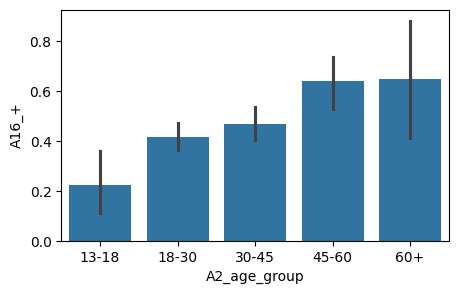

In [ ]:
# разобьем возраст на категории, и посмотрим есть ли влияние возрастных категорий на таргет
target_numeric = crx_encoding['A16_+'].astype(int)
crx_encoding['A2_age_group'] = pd.cut(crx_encoding['A2'], bins=[13, 18, 30, 45, 60, 100], labels=["13-18", '18-30', '30-45', '45-60', '60+'])

plt.figure(figsize=(5, 3))
sns.barplot(x='A2_age_group', y="A16_+", data=crx_encoding)
plt.show()

In [ ]:
#здесь мы видим хорошу зависимость, что чем старше возрастная грустна, тем больше положительных решений.

In [ ]:
# посмортим как связан А1_а и А1_в с принятием решения, скорее всего колонка А1 это пол

In [ ]:
# Посмотрим статистику для A1 в зависимости от классов A16+ и A16-
a1_a_positive = crx_encoding[crx_encoding['A16_+'] == 1]['A1_a']
a1_a_negative = crx_encoding[crx_encoding['A16_-'] == 1]['A1_a']

print('Статистика для A1 (положительный таргет):')
print(a1_a_positive.describe())

print('\nСтатистика для A1 (отрицательный таргет):')
print(a1_a_negative.describe())

Статистика для A1 (положительный таргет):
count    296.000000
mean       0.320946
std        0.467631
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A1_a, dtype: float64

Статистика для A1 (отрицательный таргет):
count    357.000000
mean       0.302521
std        0.459994
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A1_a, dtype: float64


In [ ]:
# Посмотрим статистику для A1 в зависимости от классов A16+ и A16-
a1_b_positive = crx_encoding[crx_encoding['A16_+'] == 1]['A1_b']
a1_b_negative = crx_encoding[crx_encoding['A16_-'] == 1]['A1_b']

print('Статистика для A1 (положительный таргет):')
print(a1_b_positive.describe())

print('\nСтатистика для A1 (отрицательный таргет):')
print(a1_b_negative.describe())

Статистика для A1 (положительный таргет):
count    296.000000
mean       0.679054
std        0.467631
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A1_b, dtype: float64

Статистика для A1 (отрицательный таргет):
count    357.000000
mean       0.697479
std        0.459994
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A1_b, dtype: float64


In [ ]:
#мы не видим зависимости от пола(если предположение верно), одинаковое кол-во положительных
#таргетов для обоих полов

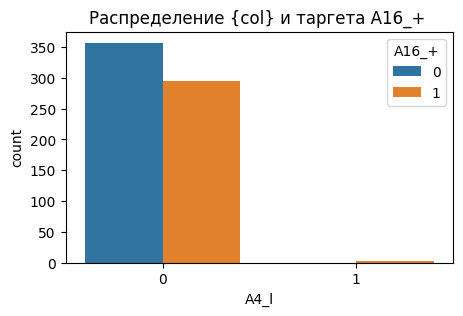

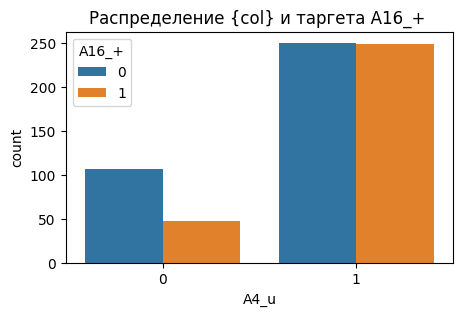

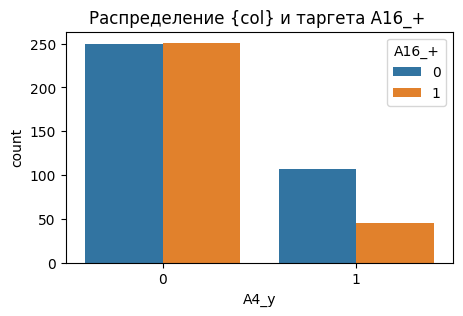

In [ ]:
# посмотрим зависимость  A16_+ и A16_- от А4
A4 = crx_encoding[['A4_l', 'A4_u', 'A4_y']]


for col in A4.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='A16_+', data=crx_encoding, dodge=True)
    plt.title('Распределение {col} и таргета A16_+ ')

    plt.show()

In [ ]:
#видим, что для "А4_l"   зависимость очень слабая,  принятие решения  "А16-" - более вероятно при
#отрицательных ответах на вопрос "А4_u",  "А16+" не зависит от ответа на вопрос "А4_u", вероятность "А16+" выше при "A4_y" - FAlse.
#скорее всего этот признак не сильно влияет на наш таргет

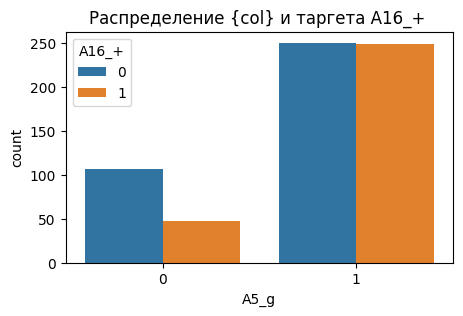

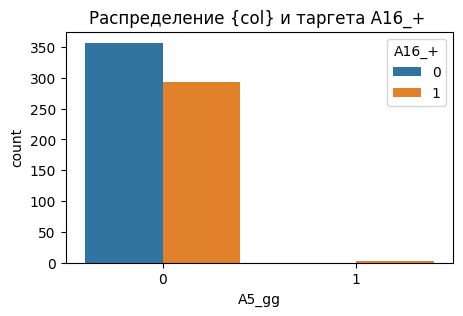

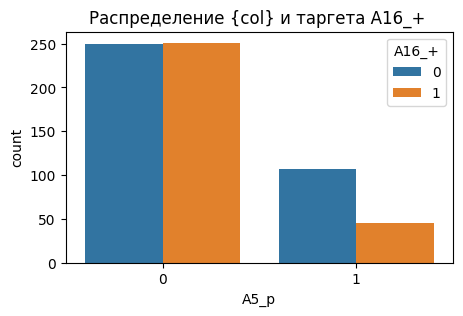

In [ ]:
# посмотрим зависимость  A16_+ и A16_- от А5
A5 = crx_encoding[['A5_g', 'A5_gg',  'A5_p'  ]]


for col in A5.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='A16_+', data=crx_encoding, dodge=True)
    plt.title('Распределение {col} и таргета A16_+ ')

    plt.show()

In [ ]:
#видим, что "А5_g" Не существенен для A16+, и вероятность того, что А16- больше, когда А5_g False. для A5_gg слабая зависимость.
#вероятность того, что А16+ больше, когда А5_p False.скорее всего этот признак не сильно влияет на наш таргет

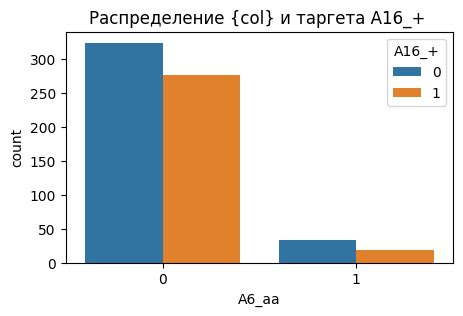

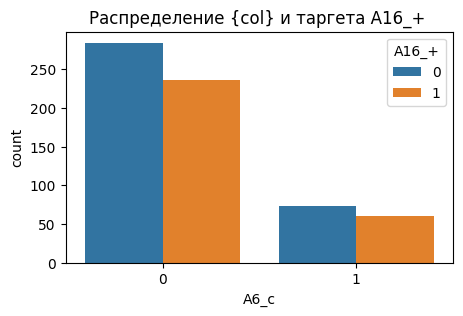

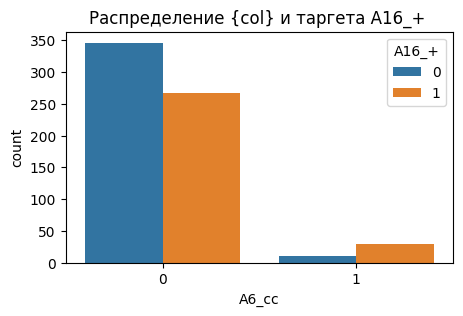

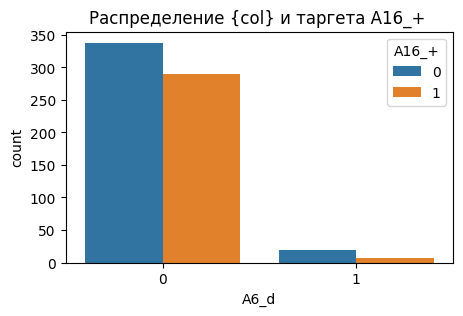

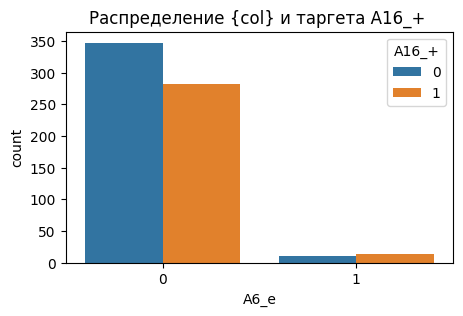

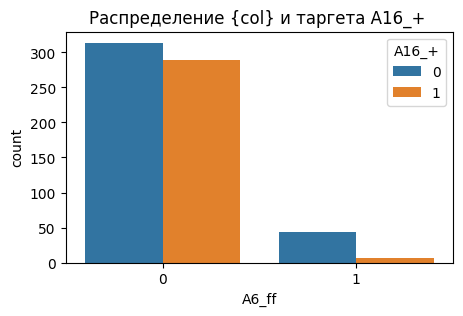

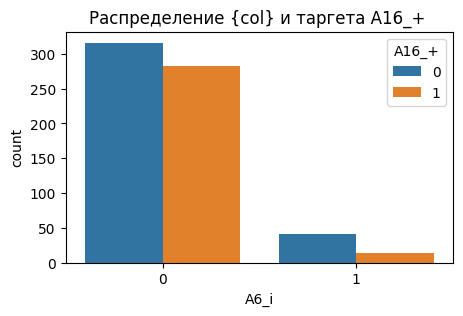

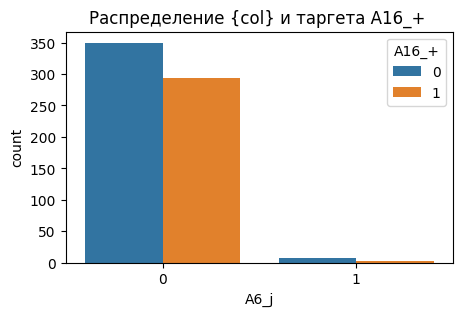

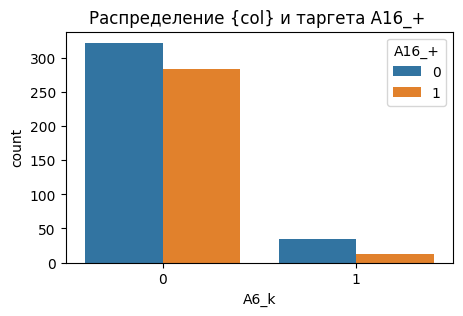

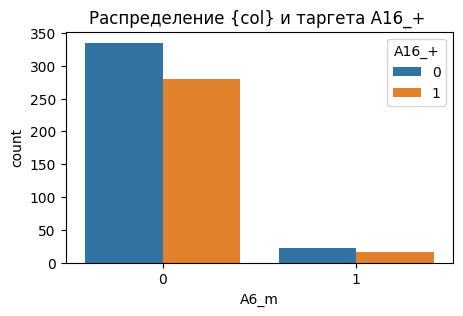

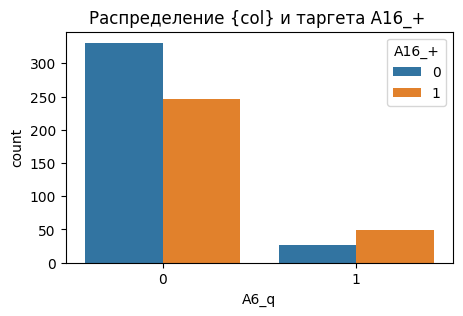

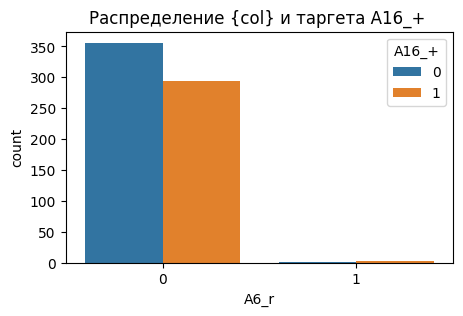

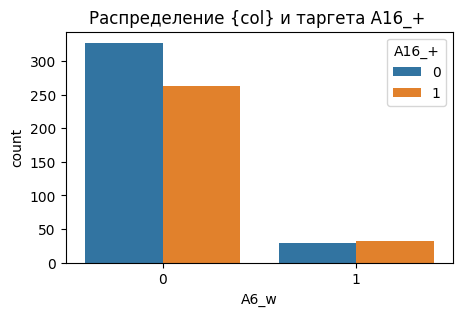

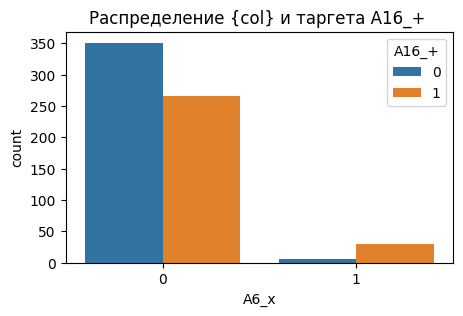

In [ ]:
# посмотрим зависимость  A16_+ и A16_- от А6
A6 = crx_encoding[['A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x' ]]


for col in A6.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='A16_+', data=crx_encoding, dodge=True)
    plt.title('Распределение {col} и таргета A16_+ ')

    plt.show()

In [ ]:
#из графиков не видим существенной зависимости для А6. скорее всего этот признак не сильно влияет на наш таргет

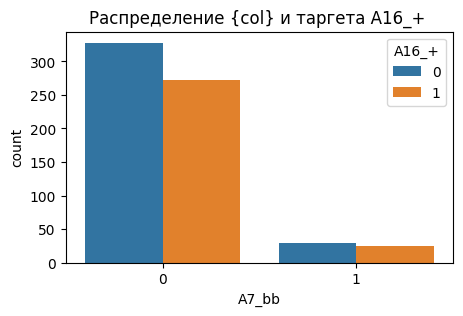

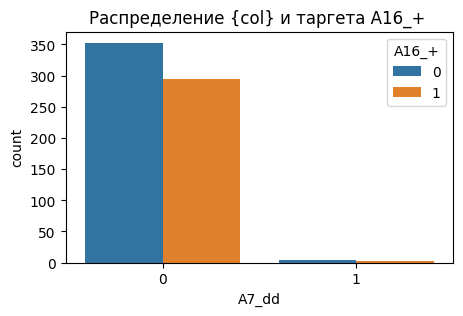

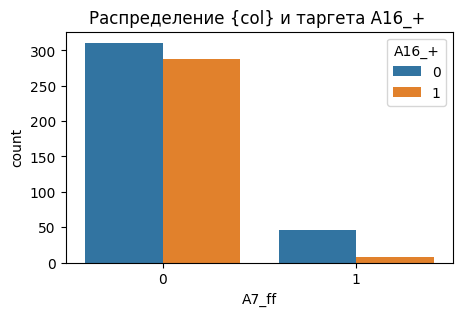

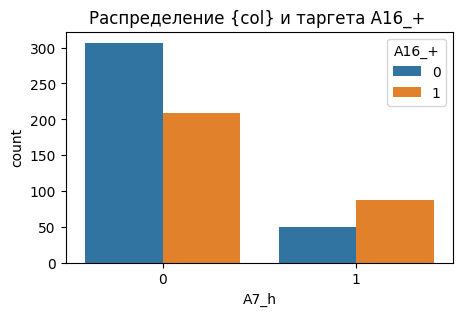

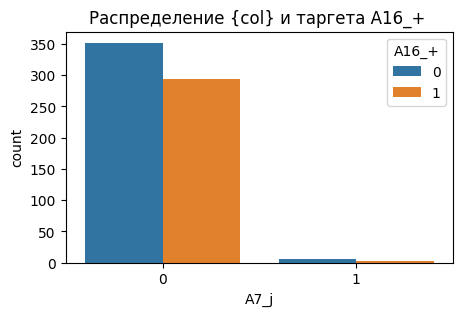

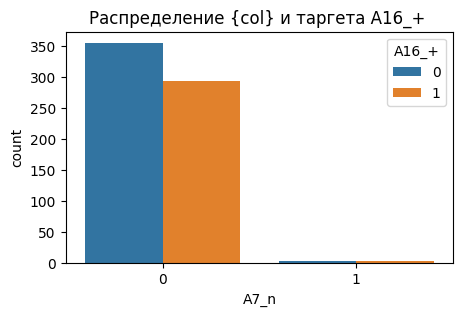

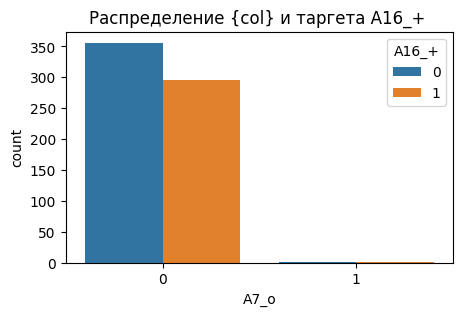

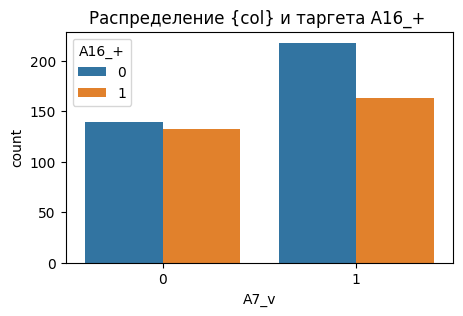

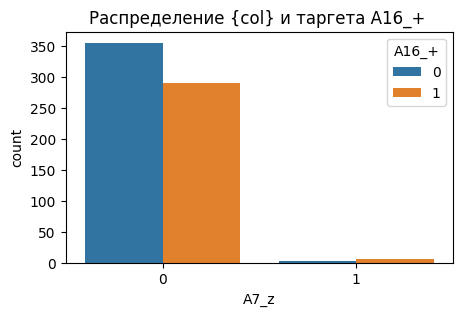

In [ ]:
# посмотрим зависимость  A16_+ и A16_- от А7
A7 = crx_encoding[['A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z' ]]


for col in A7.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='A16_+', data=crx_encoding, dodge=True)
    plt.title('Распределение {col} и таргета A16_+ ')
    plt.savefig('A7', dpi=250)
    plt.show()

In [ ]:
#мы не видим также интересных зависимостей, скорее всего этот признак не сильно влияет на наш таргет

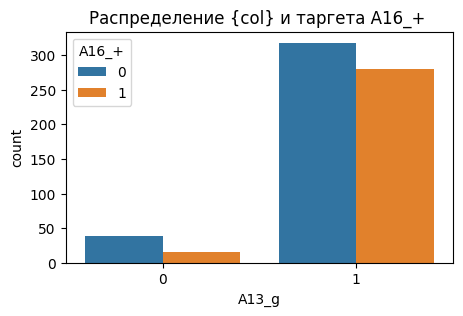

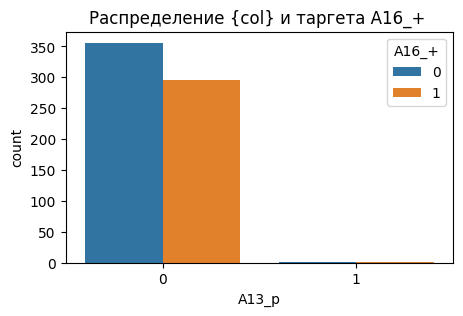

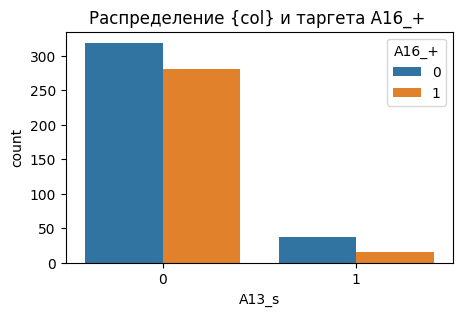

In [ ]:
# посмотрим зависимость  A16_+ и A16_- от А13
A13 = crx_encoding[['A13_g', 'A13_p', 'A13_s' ]]


for col in A13.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='A16_+', data=crx_encoding, dodge=True)
    plt.title('Распределение {col} и таргета A16_+ ')
    plt.savefig('A7', dpi=250)
    plt.show()

In [ ]:
# мы не видим также интересных зависимостей, скорее всего этот признак не сильно влияет на наш таргет

In [ ]:
# создадим новые фичи, може они нам дадут новые интересные зависимости

<Axes: xlabel='A2_A8_ratio', ylabel='Count'>

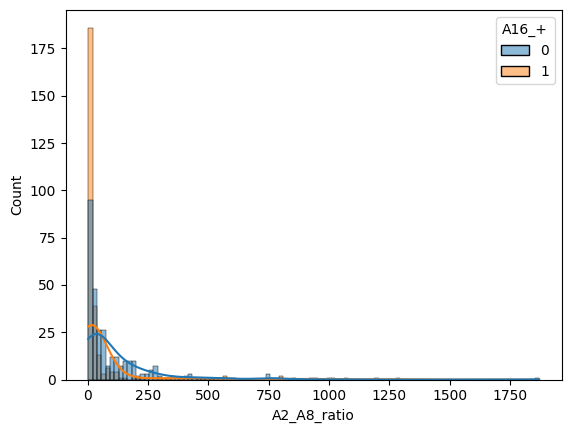

In [ ]:
# Пример A2 (доход) и A8 (сумма кредита)
crx_encoding['A2_A8_ratio'] = crx_encoding['A2'] / crx_encoding['A8']
sns.histplot(data=crx_encoding, x='A2_A8_ratio', hue='A16_+', kde=True)



In [ ]:
# к сожалению этот признак не очень показателен, половина тех и других значений А16+

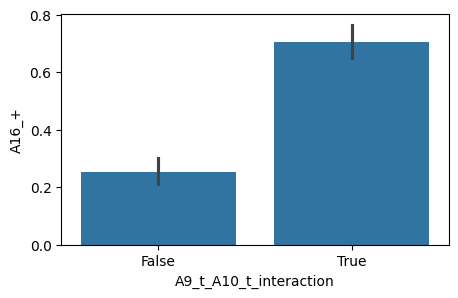

In [ ]:
# Объединим A9 и A10
crx_encoding['A9_t_A10_t_interaction'] = (crx_encoding['A10_t'] == 1) & (crx_encoding['A10_t'] == 1)

plt.figure(figsize=(5, 3))
sns.barplot(x="A9_t_A10_t_interaction", y="A16_+", data=crx_encoding)
plt.show()


In [ ]:
# видим что новая фича  показывает, что когда новая фича это False вероятнее всего будет А16_+

In [ ]:
#таким образом при предварительном анализе данных, мы видим, что некоторые признаки оказывают сильное влияние на наш таргет, некотырые незначительное,
#или очень слабое. при дальнейшем анализе посмортим какие из характеристик менее важные и мы сможем их убрать, чтоб модель работала быстрее и возможно
#давала более точные результаты

In [ ]:
#для дальнейшего анализа построим несколько моделей и сравним результаты.  построим модель логистической регресси

In [ ]:
numeric_features = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']  # числовые признаки
binary_features = ['A1_a', 'A1_b', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p',
                   'A6_aa', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j',
                   'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd',
                   'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_f',
                   'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t', 'A13_g', 'A13_p',
                   'A13_s', 'A9_t_A10_t_interaction']

all_features = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_a', 'A1_b', 'A4_l', 'A4_u',
                'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
                'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
                'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
                'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
                'A13_g', 'A13_p', 'A13_s','A9_t_A10_t_interaction']

# Создаем массивы X и Y
X = crx_encoding[all_features]
Y = crx_encoding['A16_+']

# Разделим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Масштабируем числовые признаки
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Объединяем масштабированные числовые признаки и бинарные признаки
X_train_scaled = pd.DataFrame(X_train_numeric, columns=numeric_features, index=X_train.index)
X_train_scaled = pd.concat([X_train_scaled, X_train[binary_features]], axis=1)

X_test_scaled = pd.DataFrame(X_test_numeric, columns=numeric_features, index=X_test.index)
X_test_scaled = pd.concat([X_test_scaled, X_test[binary_features]], axis=1)

#  модель логистической регрессии
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


# Функция для получения отчета
def get_report(model, X, y):
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))

# Оценка точности на тестовой выборке
accuracy = model.score(X_test_scaled, y_test)
print('Точность модели на тестовых данных:', accuracy)
print(classification_report(y_test, y_pred))

# Вывод коэффициентов модели
print('Коэффициенты модели:', model.coef_)
print('Свободный член (интерсепт):', model.intercept_)




Точность модели на тестовых данных: 0.8320610687022901
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        76
           1       0.77      0.78      0.77        55

    accuracy                           0.81       131
   macro avg       0.80      0.81      0.80       131
weighted avg       0.81      0.81      0.81       131

Коэффициенты модели: [[ 1.40319103e-03 -2.81184680e-01  2.97796642e-01  4.96201485e-01
  -2.28660509e-01  1.29870464e+00  2.03553441e-02  8.15345796e-03
   5.78528293e-01 -3.77043854e-02 -5.12315105e-01 -3.77043854e-02
   5.78528293e-01 -5.12315105e-01 -4.55536456e-01 -7.83590630e-02
   7.30917468e-01  1.49510368e-01  5.22390311e-01 -1.16890510e+00
  -7.46598188e-01 -1.09439106e-04 -2.21199047e-01 -4.81958788e-01
  -7.96820481e-03  5.95483832e-02  5.05850616e-01  1.22092595e+00
  -2.08120370e-01 -4.68483034e-02 -5.25522913e-01  2.32460874e-01
   6.72699507e-01  6.84577902e-01 -3.87027928e-02 -1.15140920e-01
  -

In [ ]:
#модель показала хорошую точность, также по коэффициентам видим какие признаки дают больший вклад в положительный таргет, а какие наоборот увеличивают
# отрицательный таргет, свободный член близок к нулю

In [ ]:
#подберем параметры для модели логистической регрессии

In [ ]:
# Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем модель логистической регрессии
LogReg = LogisticRegression(random_state=42)

# Определяем параметры
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

# Выполняем Grid Search
grid_search = GridSearchCV(estimator=LogReg, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)



# Получаем лучшую модель
best_lmodel = grid_search.best_estimator_



# Выводим лучшие гиперпараметры
print('Best Hyperparameters:', grid_search.best_params_)

# Оценка улучшенной модели
print("Улучшенная модель KNN:")
print(classification_report(y_test, y_pred_best))


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Улучшенная модель KNN:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        76
           1       0.84      0.84      0.84        55

    accuracy                           0.86       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.86      0.86      0.86       131



In [ ]:
# видим, что модель улучшилась

In [ ]:
# построим модель KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Обучаем модель
knn.fit(X_train_scaled, y_train)

# Прогнозируем на тестовых данных
y_pred = knn.predict(X_test_scaled)

# Оцениваем модель
print('Accuracy:', accuracy_score(y_test, y_pred))

# отчет по метрикам
print(classification_report(y_test, y_pred))




Accuracy: 0.8549618320610687
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        76
           1       0.85      0.80      0.82        55

    accuracy                           0.85       131
   macro avg       0.85      0.85      0.85       131
weighted avg       0.85      0.85      0.85       131



In [ ]:
# Определим сетку гиперпараметров для KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Используем GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

#  Обучим KNN с лучшими гиперпараметрами
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_best = best_knn.predict(X_test_scaled)

# Оценка улучшенной модели
print("Улучшенная модель KNN:")
print(classification_report(y_test, y_pred_best))

# Оценка точности улучшенной модели
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Точность улучшенной модели KNN: {accuracy_best:.2f}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшие гиперпараметры: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Улучшенная модель KNN:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        76
           1       0.83      0.80      0.81        55

    accuracy                           0.85       131
   macro avg       0.84      0.84      0.84       131
weighted avg       0.85      0.85      0.85       131

Точность улучшенной модели KNN: 0.85


In [ ]:
#получается мы изначально хорошо подобрали параметры, потому что результаты получили приблизительно одинаковые

Accuracy: 0.8091603053435115
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        76
           1       0.77      0.78      0.77        55

    accuracy                           0.81       131
   macro avg       0.80      0.81      0.80       131
weighted avg       0.81      0.81      0.81       131



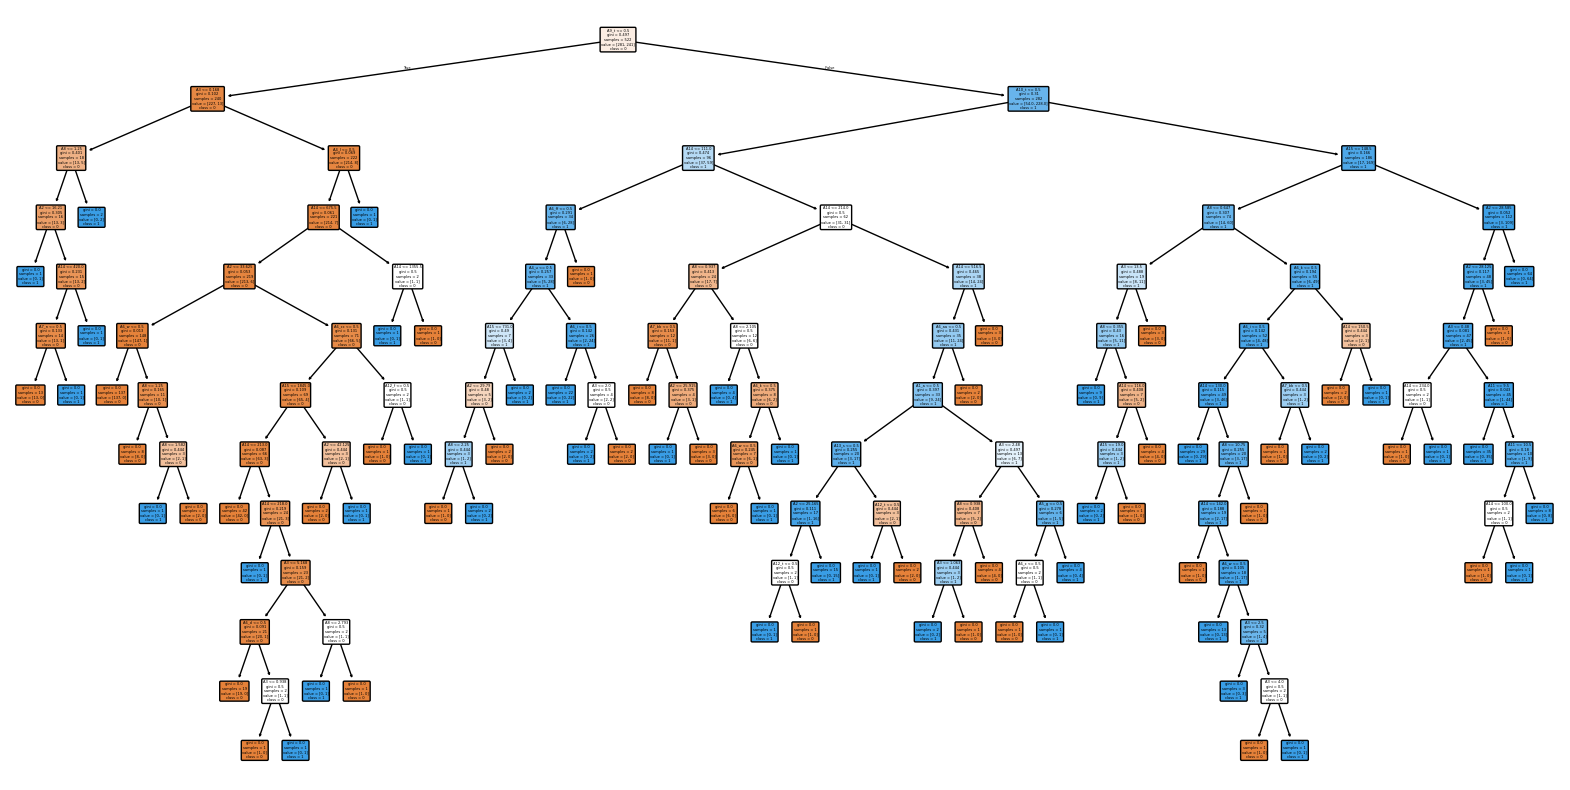

In [ ]:
all_features = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_a', 'A1_b', 'A4_l', 'A4_u',
                'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
                'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
                'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
                'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
                'A13_g', 'A13_p', 'A13_s','A9_t_A10_t_interaction']

# Создаем массивы X и Y
X = crx_encoding[all_features]
Y = crx_encoding['A16_+']

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Создаем модель дерева решений
tree_model = DecisionTreeClassifier(random_state=42)

# Обучаем модель
tree_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = tree_model.predict(X_test)

# Оцениваем точность модели
print('Accuracy:', accuracy_score(y_test, y_pred))

# полный отчет по метрикам
print(classification_report(y_test, y_pred))

# Визуализация дерева
class_names = np.unique(Y).astype(str)
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.savefig('tree_high_quality.png', dpi=300)
plt.show()


In [ ]:
# получили хороший результат, но возможно улучшить, подбором глубины (сейчас глубина у нас 8), а также удалить неважные признаки

In [ ]:
# в целом три модели хорошо справляются, видим хорошее сооношение точности и полноты

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy of Best Model: 0.8625954198473282
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        76
           1       0.84      0.84      0.84        55

    accuracy                           0.86       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.86      0.86      0.86       131



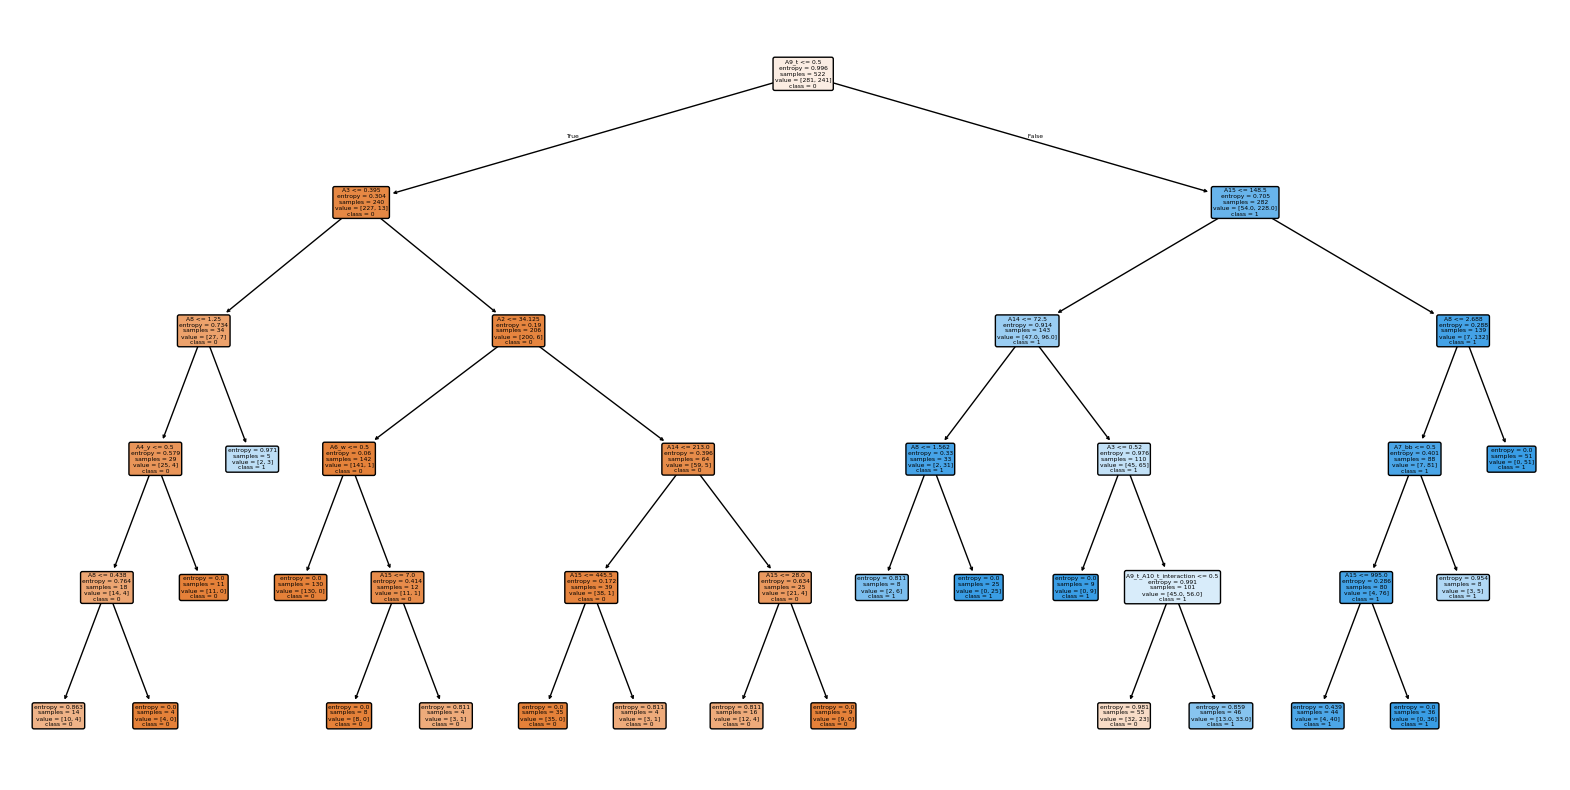

In [ ]:


# Зададим  гиперпараметры
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Создаем модель дерева решений
tree_model = DecisionTreeClassifier(random_state=42)

# Создаем GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Получаем лучшую модель
best_tmodel = grid_search.best_estimator_

# Выводим лучшие гиперпараметры
print("Best Hyperparameters:", grid_search.best_params_)

# Прогнозирование на тестовой выборке с лучшей моделью
y_pred_best = best_tmodel.predict(X_test)

# Оцениваем точность модели
print('Accuracy of Best Model:', accuracy_score(y_test, y_pred_best))

# Полный отчет по метрикам
print(classification_report(y_test, y_pred_best))

# Визуализация дерева
class_names = np.unique(Y).astype(str)
plt.figure(figsize=(20, 10))
plot_tree(best_tmodel, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.savefig('tree_high_quality_best.png', dpi=300)
plt.show()


In [ ]:
#сравним на графике полученные результаты на разных моделях до улучшения

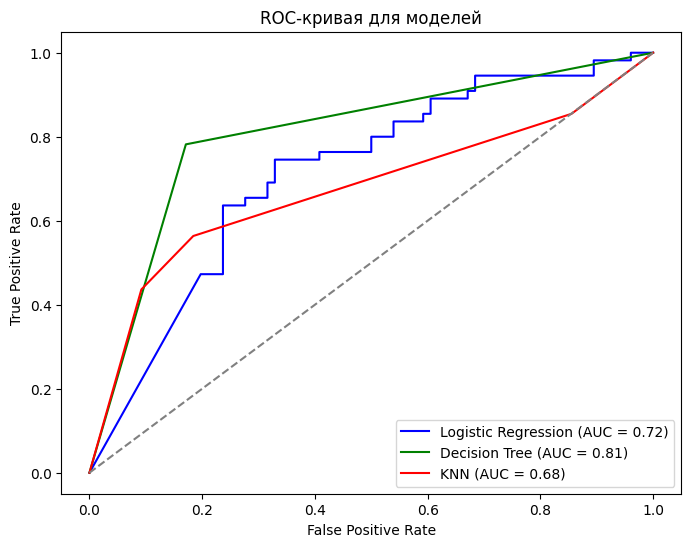

In [ ]:
# Предсказание вероятностей
# Логистическая регрессия
y_prob_logreg = model.predict_proba(X_test)[:, 1]

# Дерево решений
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

#  для KNN
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой и AUC для логистической регрессии
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Расчет ROC-кривой и AUC для дерева решений
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

# ROC-кривая и AUC для KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)


plt.figure(figsize=(8, 6))

# ROC для логистической регрессии
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# ROC для дерева решений
plt.plot(fpr_tree, tpr_tree, color='green', label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')

# ROC для KNN
plt.plot(fpr_knn, tpr_knn, color='red', label=f'KNN (AUC = {roc_auc_knn:.2f})')

# диагональная Линия
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для моделей')
plt.legend(loc='lower right')

plt.show()




In [ ]:
#теперь видим, что наилучший результат показывает модель Decision Tree

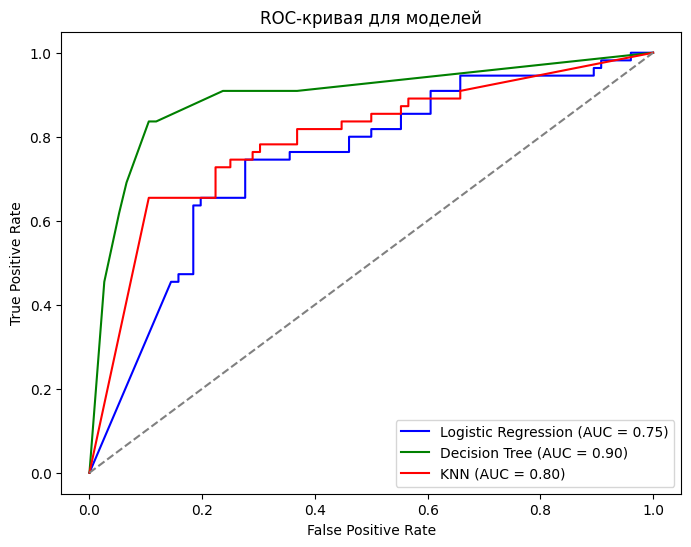

In [ ]:
# Предсказание вероятностей
# Логистическая регрессия
y_prob_logreg = best_lmodel.predict_proba(X_test)[:, 1]

# Дерево решений
y_prob_tree = best_tmodel.predict_proba(X_test)[:, 1]

#  для KNN
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой и AUC для логистической регрессии
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Расчет ROC-кривой и AUC для дерева решений
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)


# ROC-кривая и AUC для KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)


plt.figure(figsize=(8, 6))

# ROC для логистической регрессии
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# ROC для дерева решений
plt.plot(fpr_tree, tpr_tree, color='green', label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')

# ROC для KNN
plt.plot(fpr_knn, tpr_knn, color='red', label=f'KNN (AUC = {roc_auc_knn:.2f})')

# диагональная Линия
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для моделей')
plt.legend(loc='lower right')

plt.show()





In [ ]:
# на графике ROC?AUC четче видно, что после подбора гиперпараметром улучшились предсказания, сильнее всего для Decision Tree

In [ ]:
# определим важность признаков при помощи модели DecisionTreeClassifier

                   Feature  Importance
38                    A9_t    0.696204
5                      A15    0.111275
1                       A3    0.045085
4                      A14    0.042471
2                       A8    0.039661
46  A9_t_A10_t_interaction    0.018762
0                       A2    0.014689
28                   A7_bb    0.013195
26                    A6_w    0.010160
10                    A4_y    0.008498
7                     A1_b    0.000000
36                    A7_z    0.000000
30                   A7_ff    0.000000
31                    A7_h    0.000000
32                    A7_j    0.000000
33                    A7_n    0.000000
34                    A7_o    0.000000
35                    A7_v    0.000000
3                      A11    0.000000
37                    A9_f    0.000000
39                   A10_f    0.000000
40                   A10_t    0.000000
41                   A12_f    0.000000
42                   A12_t    0.000000
43                   A13_

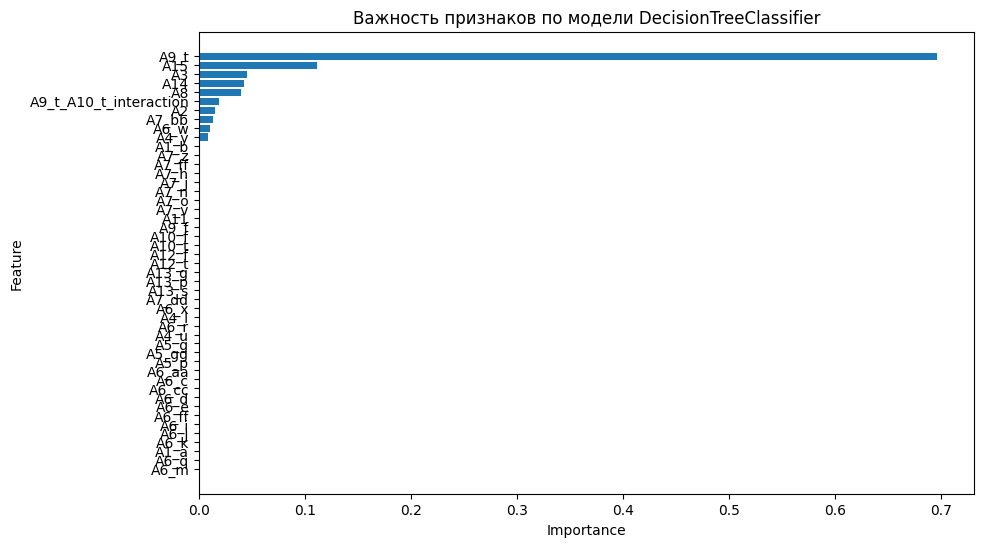

In [ ]:
importances = best_tmodel.feature_importances_

# Создаем DataFrame
feature_importances = pd.DataFrame({'Feature': all_features, 'Importance': importances})

# Сортируем по важности
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Выводим важные признаки
print(feature_importances)

# Визуализируем важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Важность признаков по модели DecisionTreeClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Чтобы важные признаки были сверху
plt.show()

In [ ]:
#видим, что многие признаки меньше 0, значит их можно попробовать удалить, так как их влияние незначительное

Accuracy of Model with Important Features: 0.8320610687022901
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        76
           1       0.75      0.89      0.82        55

    accuracy                           0.83       131
   macro avg       0.83      0.84      0.83       131
weighted avg       0.84      0.83      0.83       131



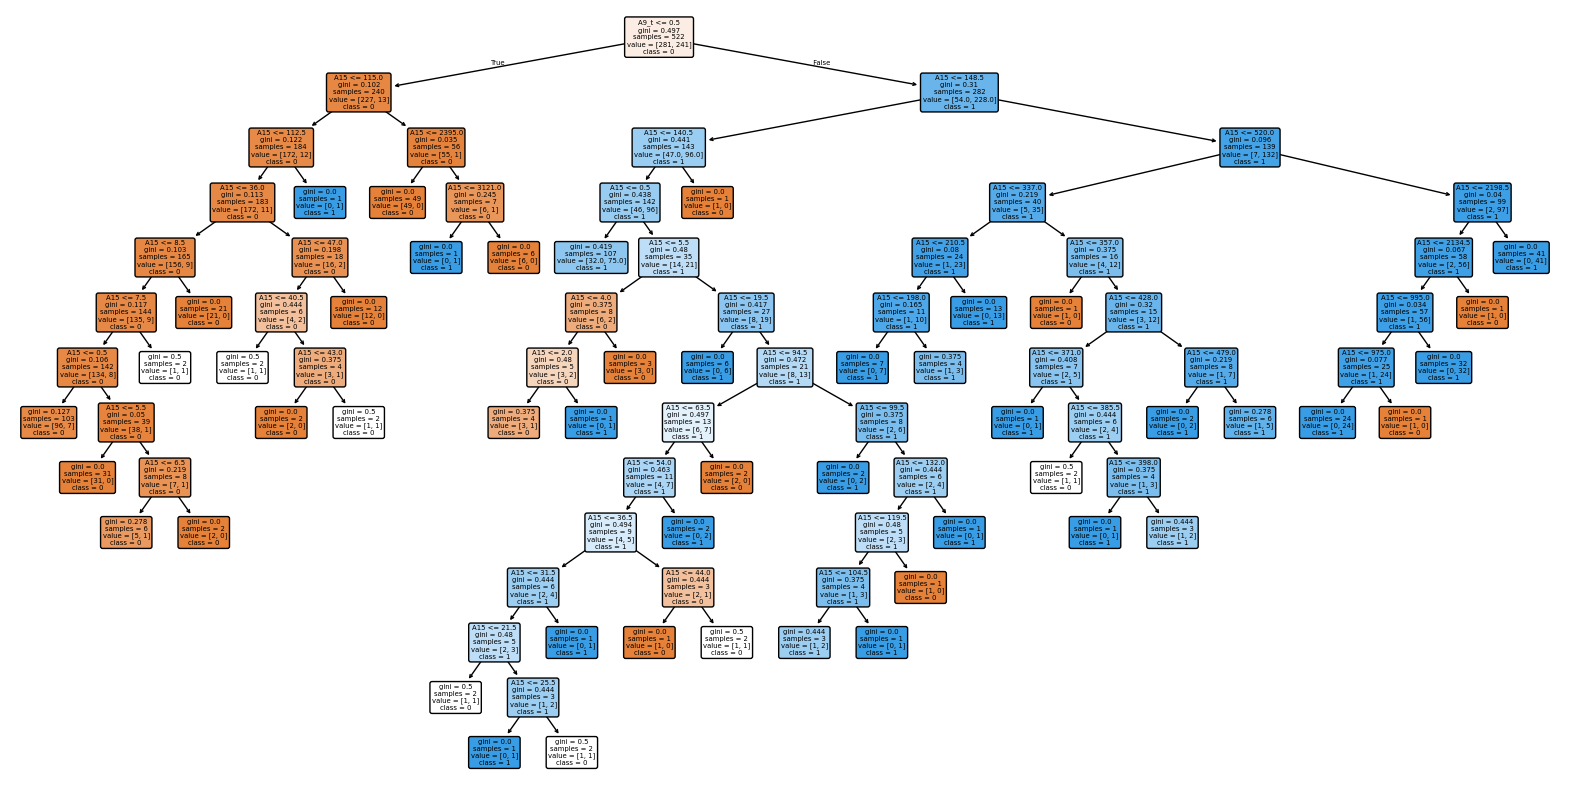

In [ ]:

threshold = 0.05  задаем порог
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

# Отфильтровываем X
X_filtered = X[important_features]

# Разделение на тренировочный и тестовый наборы с отфильтрованными признаками
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, Y, test_size=0.2, random_state=42)

# Переобучаем модель с отфильтрованными признаками
best_tree_model = DecisionTreeClassifier(random_state=42)
best_tree_model.fit(X_train_filtered, y_train_filtered)

# Прогнозирование на тестовой выборке
y_pred_filtered = best_tree_model.predict(X_test_filtered)

# Оцениваем точность модели
print('Accuracy of Model with Important Features:', accuracy_score(y_test_filtered, y_pred_filtered))

# Полный отчет по метрикам
print(classification_report(y_test_filtered, y_pred_filtered))

# Визуализация дерева с отфильтрованными признаками
plt.figure(figsize=(20, 10))
plot_tree(best_tree_model, filled=True, feature_names=X_filtered.columns, class_names=np.unique(Y).astype(str), rounded=True)
plt.savefig('tree_high_quality_filtered.png', dpi=300)
plt.show()


In [ ]:
# посмортим на результаты при лучших гипермараметрах

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy of Best Model: 0.8625954198473282
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        76
           1       0.84      0.84      0.84        55

    accuracy                           0.86       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.86      0.86      0.86       131



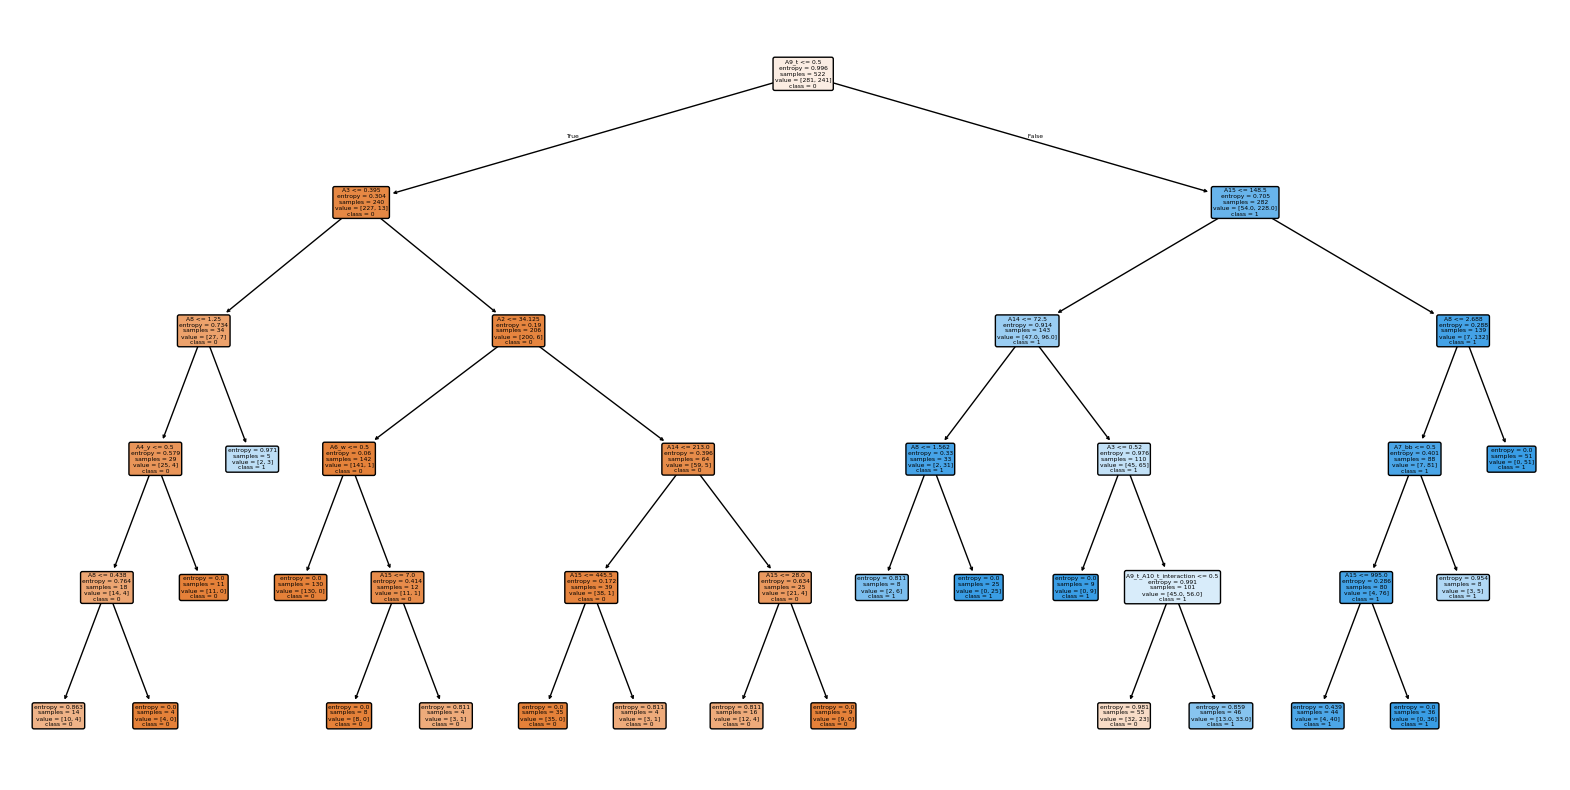

In [ ]:
# Отфильтровываем X
X_filtered = X[important_features]

# Разделение на тренировочный и тестовый наборы с отфильтрованными признаками
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, Y, test_size=0.2, random_state=42)

# Зададим  гиперпараметры
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Создаем модель дерева решений
tree_model = DecisionTreeClassifier(random_state=42)

# Создаем GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Получаем лучшую модель
best_tmodel_filter = grid_search.best_estimator_

# Выводим лучшие гиперпараметры
print("Best Hyperparameters:", grid_search.best_params_)

# Прогнозирование на тестовой выборке с лучшей моделью
y_pred_best = best_tmodel_filter.predict(X_test)

# Оцениваем точность модели
print('Accuracy of Best Model:', accuracy_score(y_test, y_pred_best))

# Полный отчет по метрикам
print(classification_report(y_test, y_pred_best))

# Визуализация дерева
class_names = np.unique(Y).astype(str)
plt.figure(figsize=(20, 10))
plot_tree(best_tmodel_filter, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.savefig('tree_high_quality_best.png', dpi=300)
plt.show()

In [ ]:
# таким образом, результаты модели не ухудшились, значит мы можем исползовать отфильтрованные признаки, для экономии времени и памяти

In [ ]:
# таким образом мы проаннализировали результаты на 3-х моделях. В целом все модели дают хорошие результаты. Дерево решений дает также нам
#представление о признаках, а также дает возможность отфильтровать признаки по важности.